# Lending website connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.create a model that will help predict this.

In [38]:
#necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df=pd.read_csv('loan_data.csv')

In [40]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [42]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


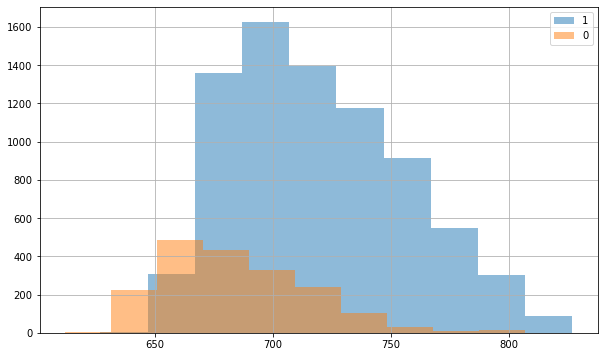

In [45]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,label='1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,label='0')
plt.legend()

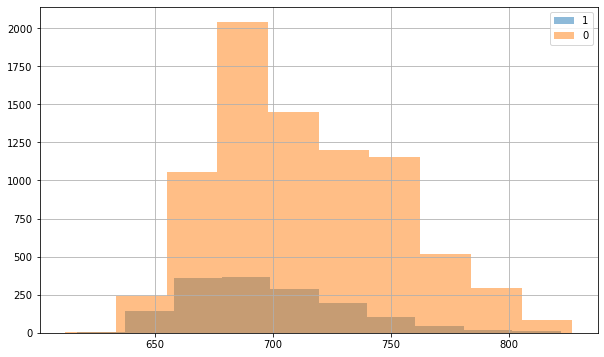

In [46]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,label='1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,label='0')
plt.legend()

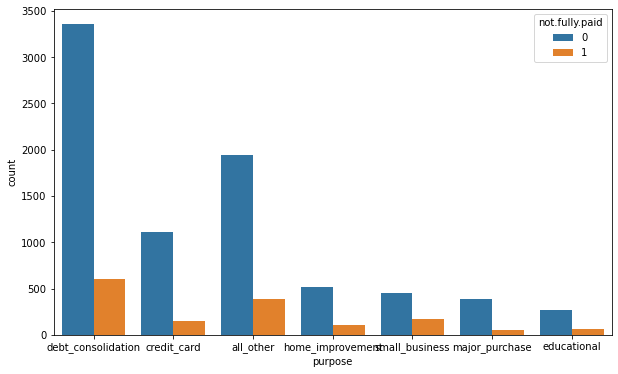

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

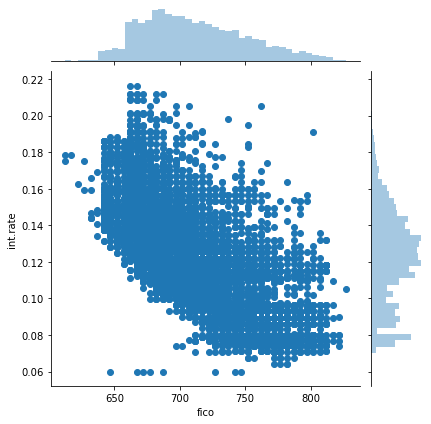

In [49]:
sns.jointplot(x='fico',y='int.rate',data=df)

In [50]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [51]:
df['purpose'].nuniqueique()

7

In [52]:
purpose_features=['purpose']

In [53]:
final_data=pd.get_dummies(df,columns=purpose_features,drop_first=True)

In [56]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [57]:
ndd=pd.get_dummies(df['purpose'],drop_first=True)

In [58]:
ndd.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [59]:
#we have converted purpose feature into numerical feature because our model will understand only numerical features

In [60]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

# Train 

In [61]:
from sklearn.model_selection import train_test_split

In [64]:
X=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [65]:
X_train.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
4845,1,0.1426,548.90,10.714418,14.67,682,3959.958333,9092,23.2,0,0,0,0,1,0,0,0,0
6910,1,0.0774,312.19,10.819778,0.86,772,5190.041667,2232,6.5,0,0,0,0,0,0,0,0,0
8146,0,0.1520,208.59,10.491274,18.53,642,3270.000000,6970,76.6,4,1,0,0,1,0,0,0,0
7113,1,0.1385,511.56,10.950807,12.74,682,3420.041667,21113,72.6,2,0,0,0,0,0,0,0,0
195,1,0.1059,130.18,11.034890,17.81,682,6330.041667,18168,68.5,2,0,0,1,0,0,0,0,0


In [66]:
X_test.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
5244,1,0.1287,274.12,10.933107,23.57,687,5100.000000,11508,51.8,0,0,0,0,1,0,0,0,0
1739,1,0.1347,805.67,11.695247,24.50,712,6420.041667,81833,84.6,0,0,0,1,0,0,0,0,0
2780,1,0.0768,124.77,10.545341,13.45,802,4560.000000,3199,7.4,0,0,0,0,1,0,0,0,0
7062,1,0.1099,274.98,10.858999,18.62,702,4940.041667,9222,34.7,3,0,1,0,1,0,0,0,0
6661,1,0.1913,550.81,11.736069,9.96,687,4561.041667,12730,95.0,1,0,0,0,0,0,0,0,1


In [67]:
y_train.head()

4845    1
6910    0
8146    1
7113    0
195     0
Name: not.fully.paid, dtype: int64

In [68]:
y_test.head()

5244    0
1739    0
2780    0
7062    0
6661    0
Name: not.fully.paid, dtype: int64

# Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree=DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predict and Evaulate decision Tree

In [72]:
dtreepredict=dtree.predict(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(confusion_matrix(y_test,dtreepredict))
print('\n')
print(classification_report(y_test,dtreepredict))

[[1971  460]
 [ 341  102]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.18      0.23      0.20       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.73      2874



# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
randomforest=RandomForestClassifier(n_estimators=500)

In [79]:
#500 no of trees int the forest passes

In [80]:
randomforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [81]:
rand_predict=randomforest.predict(X_test)

In [82]:
print(confusion_matrix(y_test,rand_predict))
print('\n')
print(classification_report(y_test,rand_predict))

[[2420   11]
 [ 434    9]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.45      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.65      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [84]:
#for n=500 trees our model predicted 79% accuracy based on the confusion Matrix
#between decision tree and Random forest our Random forest Did well
#more Feature Engineering is required for better machine learning model